In [613]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [627]:
df = pd.read_csv('obs_2007_gazebo_iiwa_stopping.bag_20230720-135812.p.csv')
#df = pd.read_csv('obs_single_20230724-124651.p.csv')
print(df.keys())

Index(['Unnamed: 0', 'markerid', 't', 'q', 'T_W8', 'T_WC', 'M', 'Mx', 'My',
       'Mz', 'Mrx', 'Mry', 'Mrz', 'Ex', 'Ey', 'Ez', 'Erx', 'Ery', 'Erz', 'Cx',
       'Cy', 'Cz', 'Crx', 'Cry', 'Crz', 'Cmx', 'Cmy', 'Cmz', 'Cmrx', 'Cmry',
       'Cmrz'],
      dtype='object')


In [628]:
markerids = set(df['markerid'].to_numpy())

In [629]:
print(markerids)

{1, 2, 3, 4, 5, 6, 7, 19, 20, 21}


In [637]:
subset = df[df['markerid']==4]
subset = df

2375


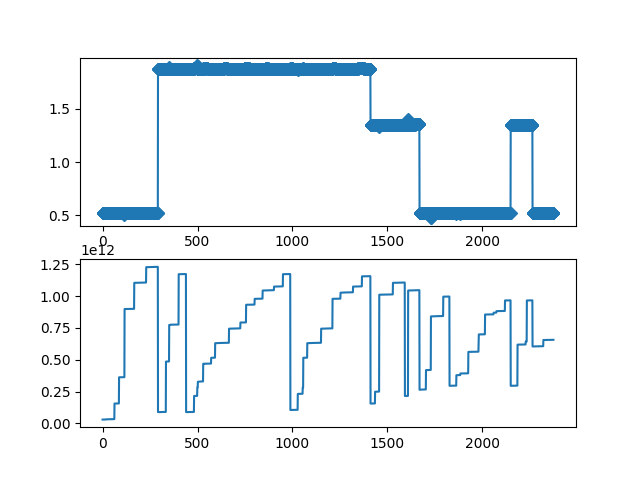

In [638]:
fig, (ax, ax2) = plt.subplots(2, 1)
idx = np.array(subset.index.values.tolist())
data = subset['Mz'].to_numpy()
time = subset['t']
ax.plot(idx, data, marker="D")
ax2.plot(idx, time)
print(len(data))

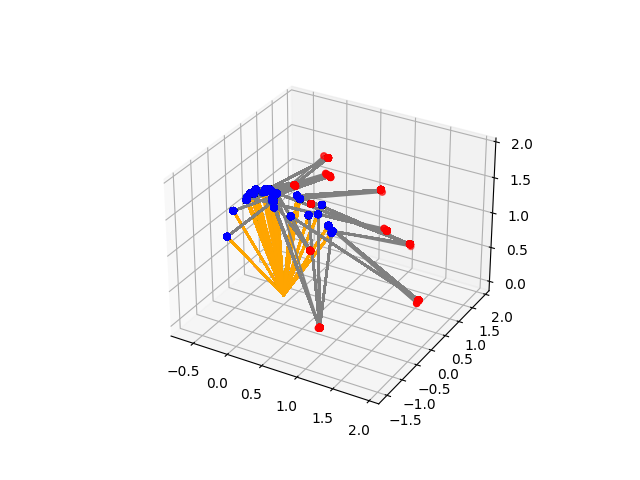

In [639]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Mx = None
for i in ['M', 'E', 'C', 'Cm', 'Mr', 'Er', 'Cr', 'Cmr']:
    for j in ['x', 'y', 'z']:
        exec(i+j + " = " + f"subset['{i+j}'].to_numpy()")
ax.scatter(Mx, My, Mz, c='red')

ax.scatter(Ex, Ey, Ez, c='green')

ax.scatter(Cx, Cy, Cz, c='blue')

for x, y, z in zip(Ex, Ey, Ez):
    ax.plot([0, x], [0, y], [0, z], c="orange")
    
for x1, y1, z1, x2, y2, z2 in zip(Ex, Ey, Ez, Cx, Cy, Cz):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c="grey")
    
for x1, y1, z1, x2, y2, z2 in zip(Cx, Cy, Cz, Mx, My, Mz):
    ax.plot([x1, x2], [y1, y2], [z1, z2], c="grey")


In [640]:
print(Mx)
print(My)
print(Mz)
print(Mrx)
print(Mry)
print(Mrz)
print(f'{Mx[0]} {My[0]} {Mz[0]} {Mrx[0]} {Mry[0]} {Mrz[0]}')
print(f"rosrun tf static_transform_publisher {Mx[0]} {My[0]} {Mz[0]} {Mrx[0]} {Mry[0]} {Mrz[0]} r1/world marker2 1")


[ 1.20779618  1.20781737  1.20783919 ... -0.43220704 -0.43213629
 -0.43206339]
[1.51635898 1.51634262 1.51632577 ... 1.88703031 1.88705433 1.88707908]
[0.51618718 0.51620018 0.51621357 ... 0.51765911 0.51767989 0.5177013 ]
[-1.23782059 -1.23781199 -1.23780312 ... -1.29668778 -1.29667648
 -1.29666485]
[ 0.64276676  0.64277382  0.64278109 ... -0.21638205 -0.21635438
 -0.21632587]
[1.36579723 1.36578173 1.36576577 ... 1.6360388  1.63600733 1.63597492]
1.2077961838014115 1.5163589755833051 0.5161871764496279 -1.2378205933713795 0.6427667624591265 1.365797227814042
rosrun tf static_transform_publisher 1.2077961838014115 1.5163589755833051 0.5161871764496279 -1.2378205933713795 0.6427667624591265 1.365797227814042 r1/world marker2 1


In [641]:
print(Ex)
print(Ey)
print(Ez)
print(Erx)
print(Ery)
print(Erz)
print(f'{Ex[0]} {Ey[0]} {Ez[0]} {Erx[0]} {Ery[0]} {Erz[0]}')

[-0.27144293 -0.27144306 -0.27144319 ...  0.3537106   0.35371695
  0.3537235 ]
[0.24765764 0.24765771 0.24765777 ... 0.48970357 0.48968741 0.48967075]
[1.3345237  1.33452365 1.33452359 ... 1.22208691 1.22209983 1.22211315]
[-0.68822749 -0.68822785 -0.68822823 ... -0.78480604 -0.78477149
 -0.78473588]
[0.02262669 0.02262623 0.02262576 ... 0.38843282 0.3884419  0.38845124]
[0.73101715 0.73100289 0.73098819 ... 1.98026076 1.98021717 1.98017226]
-0.2714429306925219 0.2476576419694787 1.3345237047818257 -0.6882274936033097 0.0226266946587232 0.7310171514564097


In [622]:
print(f"rosrun tf static_transform_publisher {Cmx[0]} {Cmy[0]} {Cmz[0]} {Cmrx[0]} {Cmry[0]} {Cmrz[0]} camera_corr marker2_gazebo 1")


rosrun tf static_transform_publisher -0.0007741398940339 0.1088785767177864 1.4777868434846926 -2.397450377164321 0.0010987753941185 0.0007716614731032 camera_corr marker2_gazebo 1


In [623]:
print(Cx)
print(Cy)
print(Cz)
print(Crx)
print(Cry)
print(Crz)

[-5.81399791e-07]
[-3.71620142e-13]
[1.461]
[-5.68434189e-14]
[-9.33344255e-08]
[6.06243359e-07]


In [624]:
angles = [0, 3.1415, -3.1415]
cmds=[]
for i in angles:
    for j in angles:
        for k in angles:
            cmds.append(f"rosrun tf static_transform_publisher 0 0 0 {i} {j} {k} marker2 corr 1")

In [625]:
for (i, cmd) in enumerate(cmds):
    print(i)
    print(cmd+"\n")

0
rosrun tf static_transform_publisher 0 0 0 0 0 0 marker2 corr 1

1
rosrun tf static_transform_publisher 0 0 0 0 0 3.1415 marker2 corr 1

2
rosrun tf static_transform_publisher 0 0 0 0 0 -3.1415 marker2 corr 1

3
rosrun tf static_transform_publisher 0 0 0 0 3.1415 0 marker2 corr 1

4
rosrun tf static_transform_publisher 0 0 0 0 3.1415 3.1415 marker2 corr 1

5
rosrun tf static_transform_publisher 0 0 0 0 3.1415 -3.1415 marker2 corr 1

6
rosrun tf static_transform_publisher 0 0 0 0 -3.1415 0 marker2 corr 1

7
rosrun tf static_transform_publisher 0 0 0 0 -3.1415 3.1415 marker2 corr 1

8
rosrun tf static_transform_publisher 0 0 0 0 -3.1415 -3.1415 marker2 corr 1

9
rosrun tf static_transform_publisher 0 0 0 3.1415 0 0 marker2 corr 1

10
rosrun tf static_transform_publisher 0 0 0 3.1415 0 3.1415 marker2 corr 1

11
rosrun tf static_transform_publisher 0 0 0 3.1415 0 -3.1415 marker2 corr 1

12
rosrun tf static_transform_publisher 0 0 0 3.1415 3.1415 0 marker2 corr 1

13
rosrun tf static_tran